In [1]:
!pip install scipy


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import signal

In [2]:
data = pd.read_csv("ex_data\walkl_zyy_EPOCFLEX_2023.03.26T14.58.03+08.00.md.bp.csv", header=1)
ch_info = data.iloc[:, [0] + list(range(4, 36))]
data_c = ch_info.iloc[:,1:]

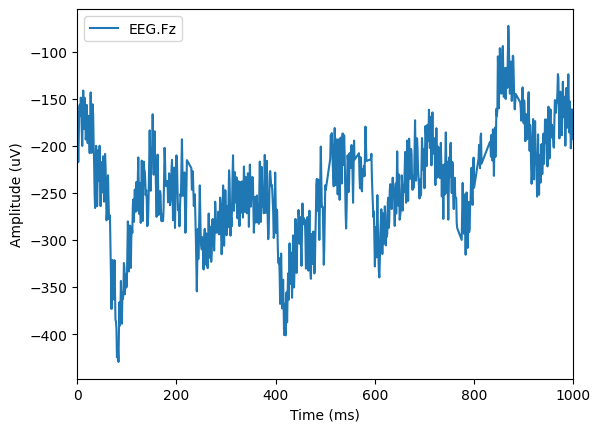

In [3]:
ch_1 = pd.DataFrame(data_c.iloc[:1000,0])
ch_1.plot()
plt.xlim(0,1000)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (uV)')
plt.show()

In [4]:
data_c

,EEG.Fz,EEG.Fp1,EEG.F7,EEG.F3,EEG.FC1,EEG.C3,EEG.FC5,EEG.FT9,EEG.T7,EEG.CP5,...,EEG.CP6,EEG.T8,EEG.FT10,EEG.FC6,EEG.C4,EEG.FC2,EEG.F4,EEG.F8,EEG.Fp2,EEG.HighBitFlex
0,-164.427017,-98.555275,-44.674053,51.349201,-336.146179,-116.980980,-329.976990,-120.058960,77.084396,-94.759293,...,-388.045563,-167.908920,-94.236794,-100.020035,141.301331,26.420782,-151.020340,-63.918491,-183.062363,3840.0
1,-193.976440,-130.219803,-57.437069,20.559391,-357.839264,-132.745544,-339.380859,-134.283524,44.731930,-111.570686,...,-408.662109,-187.721008,-126.417938,-129.121552,121.180023,4.877438,-183.144714,-96.129959,-213.105453,3840.0
2,-217.348618,-156.729584,-76.847328,5.681909,-371.826019,-154.129715,-347.750732,-152.592316,46.736431,-106.848343,...,-420.036530,-211.099442,-158.566910,-151.021667,138.477310,-1.787440,-215.236954,-126.259979,-234.409271,3840.0
3,-192.540497,-129.932846,-61.401249,23.094688,-357.109589,-136.557129,-325.886047,-143.730484,67.181999,-101.106110,...,-395.538025,-194.494507,-135.866806,-126.279869,171.126526,-3.834883,-192.480179,-104.616798,-212.145630,3968.0
4,-159.560257,-97.015228,-28.552155,43.563900,-334.210938,-103.632874,-292.772461,-110.799065,64.040970,-113.300392,...,-364.404022,-161.512314,-102.943237,-93.365898,195.546158,-5.880279,-159.500000,-71.724487,-179.145782,4096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18859,192.423340,123.789581,96.233940,-78.070389,263.642487,160.326004,-118.234238,155.726639,35.203728,27.926977,...,-16.018299,184.599762,213.632339,3.056048,1283.601563,-1320.681885,151.576401,152.225204,107.150604,0.0
18860,159.955536,91.390404,63.862320,-101.046165,252.108078,135.574921,-136.046768,123.295532,2.893140,32.509819,...,-39.568436,152.139771,181.143326,-29.222393,1271.047241,-1351.636597,120.174049,120.822205,78.354218,0.0
18861,128.544815,59.023628,31.523073,-114.777428,219.580597,103.676262,-160.501495,90.896851,-12.991292,34.014233,...,-48.238098,136.618408,162.006790,-52.759323,1266.190063,-1376.412720,101.098495,100.209076,56.246635,0.0
18862,158.130112,80.481529,59.668472,-95.707268,207.065628,131.237198,-175.197922,123.593651,19.809391,40.640217,...,-38.968319,169.269470,187.972488,-29.140411,1249.042358,-1342.248535,128.149704,122.650406,81.293465,0.0


In [5]:
ch = data_c.iloc[:,0]
ch

0       -164.427017
1       -193.976440
2       -217.348618
3       -192.540497
4       -159.560257
            ...    
18859    192.423340
18860    159.955536
18861    128.544815
18862    158.130112
18863    175.902756
Name: EEG.Fz, Length: 18864, dtype: float64

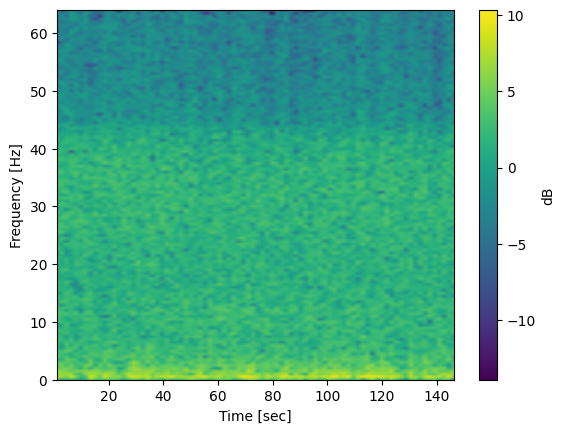

In [6]:
freq = 128
t = np.arange(0, 16443/freq , 1/freq)
signal = ch.to_numpy()

freq,t,Sxx = scipy.signal.spectrogram(signal, freq)

amplitude = np.abs(Sxx)
plt.pcolormesh(t, freq, np.log(amplitude), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='dB')
plt.show()

AttributeError: 'QuadMesh' object has no attribute 'shape'

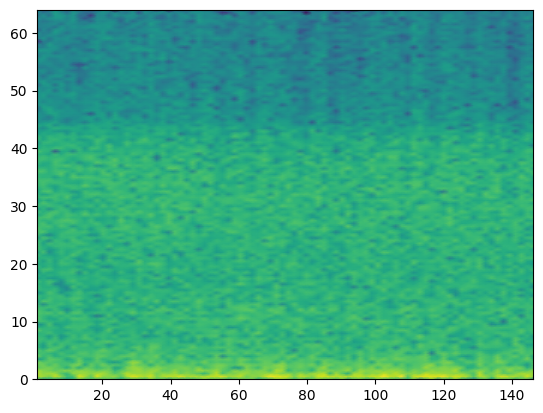

In [8]:
spectrogram = plt.pcolormesh(t, freq, np.log(amplitude), shading='gouraud')
spectrogram.shape